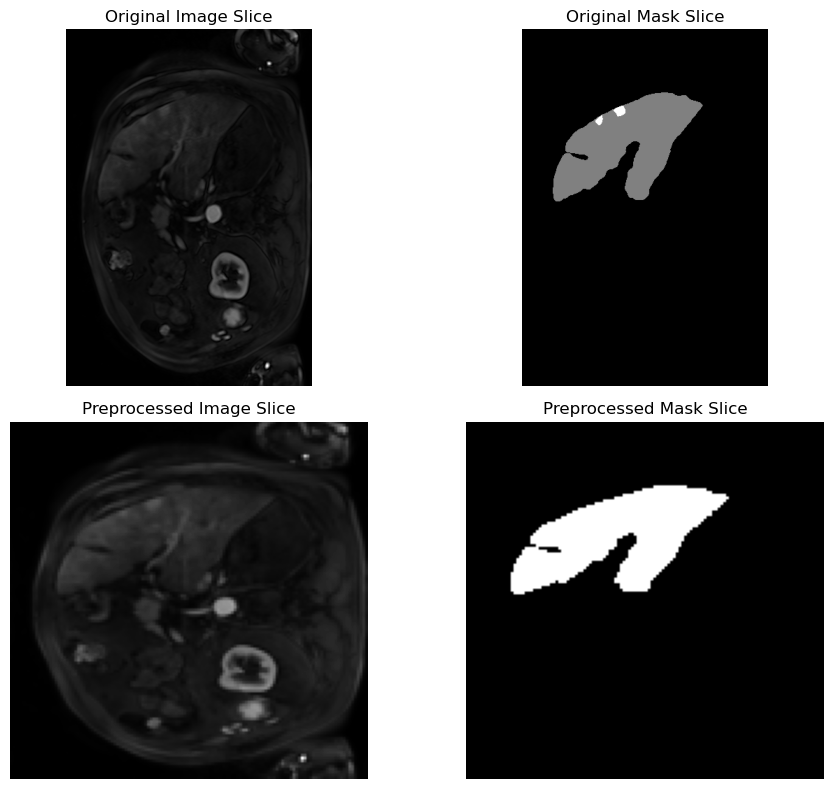

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from skimage.transform import resize

# Load one sample image and mask
image_path = 'C:/Users/ADMIN/Desktop/images/im25.nii'
mask_path = 'C:/Users/ADMIN/Desktop/labels/lb25.nii'

img_raw = nib.load(image_path).get_fdata()
mask_raw = nib.load(mask_path).get_fdata()

# Store raw for plotting
slice_idx = img_raw.shape[2] // 2
img_raw_slice = img_raw[:, :, slice_idx]
mask_raw_slice = mask_raw[:, :, slice_idx]

# ----- Preprocessing -----

# Align shapes
min_shape = np.minimum(img_raw.shape, mask_raw.shape)
img = img_raw[:min_shape[0], :min_shape[1], :min_shape[2]]
mask = mask_raw[:min_shape[0], :min_shape[1], :min_shape[2]]

# Normalize image
scaler = MinMaxScaler()
img = scaler.fit_transform(img.reshape(-1, 1)).reshape(img.shape)

# Binarize mask
mask = (mask > 0).astype(np.uint8)

# Resize
target_shape = (128, 128, 64)
img_resized = resize(img, target_shape, order=1, preserve_range=True)
mask_resized = resize(mask, target_shape, order=0, preserve_range=True).astype(np.uint8)

# Take middle slice after preprocessing
slice_idx_post = target_shape[2] // 2
img_post_slice = img_resized[:, :, slice_idx_post]
mask_post_slice = mask_resized[:, :, slice_idx_post]

# ----- Plotting -----
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(img_raw_slice, cmap='gray')
axes[0, 0].set_title('Original Image Slice')

axes[0, 1].imshow(mask_raw_slice, cmap='gray')
axes[0, 1].set_title('Original Mask Slice')

axes[1, 0].imshow(img_post_slice, cmap='gray')
axes[1, 0].set_title('Preprocessed Image Slice')

axes[1, 1].imshow(mask_post_slice, cmap='gray')
axes[1, 1].set_title('Preprocessed Mask Slice')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()